In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [3]:
df.head()
df['dt'] = pd.to_datetime(df['dt'])
df['year'], df['month'] = df['dt'].dt.year, df['dt'].dt.month

In [4]:
df = df[df['year']>1950]

In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month
2486,1951-01-01,-3.433,0.527,Åland,1951,1
2487,1951-02-01,-2.421,0.662,Åland,1951,2
2488,1951-03-01,-4.199,0.558,Åland,1951,3
2489,1951-04-01,2.424,0.470,Åland,1951,4
2490,1951-05-01,5.322,0.616,Åland,1951,5


In [6]:
# Replace Missing Values
df[df['AverageTemperature'].isnull() ]
df['AverageTemperature'] = df.groupby("month").transform(lambda x: x.fillna(x.mean()))


In [7]:
# print(missing_values_replacement(df))


# def func(x):
#     x

# def missing_values_replacement(df):
    
#     if pd.isnull(df['AverageTemperature']):
#         print('Yes')
#         year = df['year']
#         month = df['month']
#         country = df['Country']
        
#         print(year,month,country)
#         if year <=2006:
#             nxt_five = np.arange(year,year+5,1)
#         else:
#             nxt_five = np.arange(year,year-5,-1)
#         avg_tmp =np.zeros(0)
#         for i in range(5):
#             avg_tmp.append(np.array(df.loc[(df['month'] == month) & df['year'].isin(nxt_five) & (df['Country']==country)]['AverageTemperature']))
#         return np.nanmean(avg_tmp)
#     else:
#         return df['AverageTemeprature']
    

In [8]:
df.head()
df2 = df.groupby(['Country','year'])['AverageTemperature'].mean()

In [9]:
df2.to_csv('Countries_annual_temp.csv')

In [10]:
df3 = pd.DataFrame(df2)
df3.head()

AverageTemperature
Country     year                    
Afghanistan 1951           13.967750
            1952           14.175417
            1953           14.650750
            1954           13.691333
            1955           14.642583

In [11]:
# Data Exploration
df3.reset_index(inplace=True)
df3.head()

,Country,year,AverageTemperature
0,Afghanistan,1951,13.967750
1,Afghanistan,1952,14.175417
2,Afghanistan,1953,14.650750
3,Afghanistan,1954,13.691333
4,Afghanistan,1955,14.642583


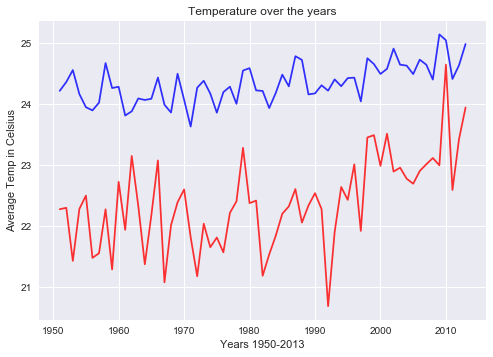

In [12]:
plt.plot(df3[df3.Country=='Iraq']['year'],df3[df3.Country=='Iraq']['AverageTemperature'],color='r',alpha=0.8)
plt.xlabel('Years 1950-2013')
plt.plot(df3[df3.Country=='India']['year'],df3[df3.Country=='India']['AverageTemperature'],color='b',alpha=0.8)
plt.ylabel('Average Temp in Celsius')
plt.title('Temperature over the years')


In [13]:
def make_decade(yr):
    if yr <=1960:
        return 1
    elif yr <=1970:
        return 2
    elif yr <=1980:
        return 3
    elif yr <=1990:
        return 4
    elif yr <=2000:
        return 5
    elif yr <=2010:
        return 6
    else:
        return 7

df3['decade'] = df3['year'].apply(lambda x: make_decade(x))


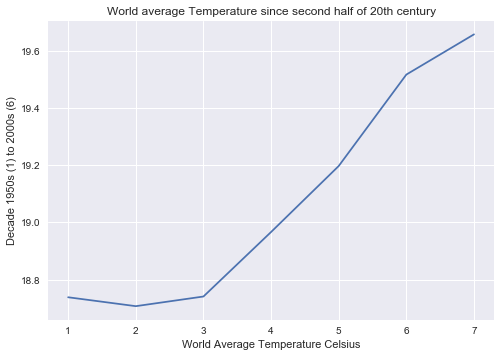

In [14]:
df4 = df3.groupby('decade')['AverageTemperature'].mean()
df4
plt.plot(df4.index,df4)
plt.ylabel('Decade 1950s (1) to 2000s (6)')
plt.xlabel('World Average Temperature Celsius')
plt.title('World average Temperature since second half of 20th century')

## PART - 2

In [15]:
df_ind = pd.DataFrame(df[df["Country"]=='India'][["dt","AverageTemperature"]])
df_ind = df_ind.reset_index(drop=True)
df_ind.head()

,dt,AverageTemperature
0,1951-01-01,16.331
1,1951-02-01,19.315
2,1951-03-01,23.841
3,1951-04-01,26.345
4,1951-05-01,29.826


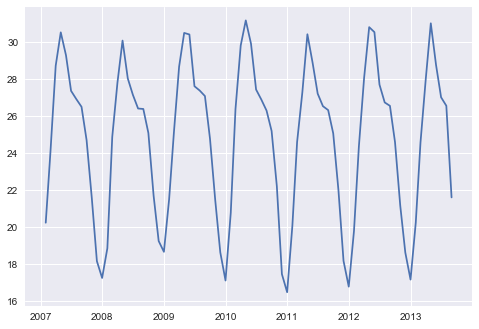

In [16]:
plt.plot(df_ind['dt'][-80:],df_ind['AverageTemperature'][-80:])

# DICKEY FULLER TEST 
## TO CHECK IF OUR TIME SERIES is STATIONARY

In [17]:
## DF Test

from pandas import Series
from statsmodels.tsa.stattools import adfuller

X = df_ind['AverageTemperature'].values
X
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.788133
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


## Applying various Time Series Models


### Split to train and test data

In [18]:
# df_ind.set_index('dt',inplace=True)
train = df_ind[:-45]
test = df_ind[-45:]

test.head()

,dt,AverageTemperature
708,2010-01-01,17.109
709,2010-02-01,20.764
710,2010-03-01,26.373
711,2010-04-01,29.814
712,2010-05-01,31.169


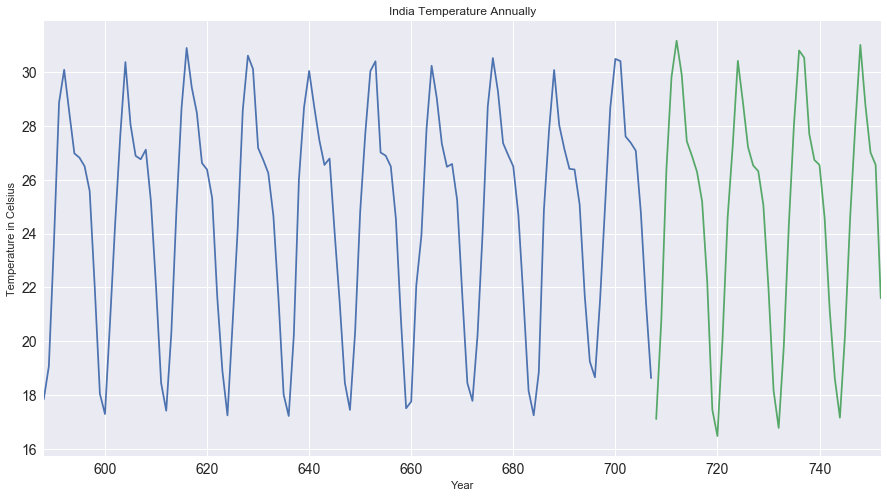

In [19]:
train[-120:].AverageTemperature.plot(figsize=(15,8), title= 'India Temperature Annually', fontsize=14)
test.AverageTemperature.plot(figsize=(15,8), title= 'India Temperature Annually', fontsize=14)

plt.ylabel('Temperature in Celsius')
plt.xlabel('Year')
plt.show()

## Method 1: Naive Approach Yt+1 = Yt

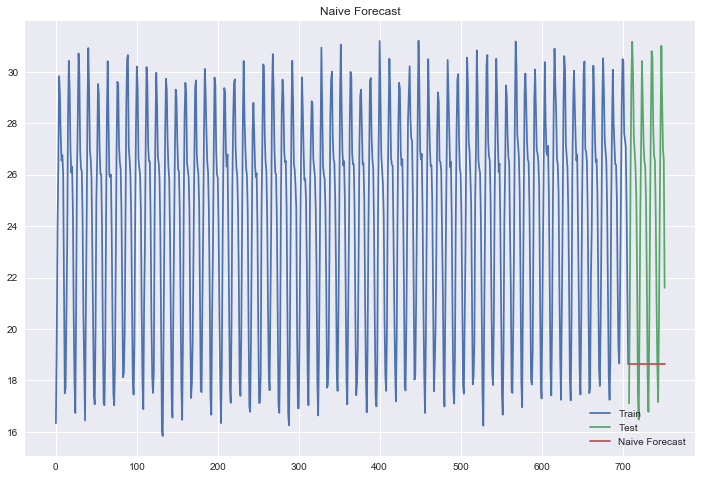

In [20]:
dd= np.asarray(train.AverageTemperature)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AverageTemperature'], label='Train')
plt.plot(test.index,test['AverageTemperature'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.AverageTemperature, y_hat.naive))
print(rms)

#RMSE = 7.514683158383174


7.514683158383174


## Method -2 Simple Average

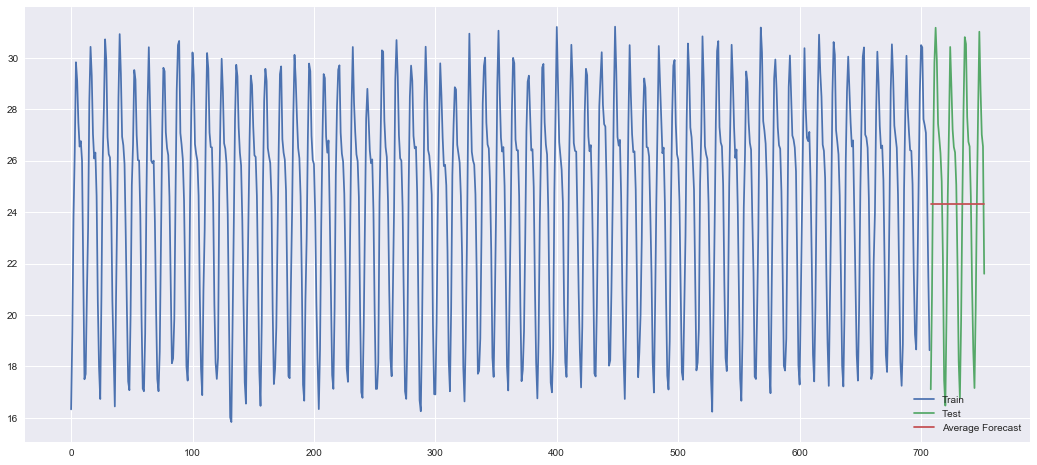

In [22]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['AverageTemperature'].mean()
plt.figure(figsize=(18,8))
plt.plot(train['AverageTemperature'], label='Train')
plt.plot(test['AverageTemperature'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [23]:
rms = sqrt(mean_squared_error(test.AverageTemperature, y_hat_avg.avg_forecast))
print(rms)

# RMSE = 4.37069105869335

4.37069105869335


## Method - 3 Moving Average

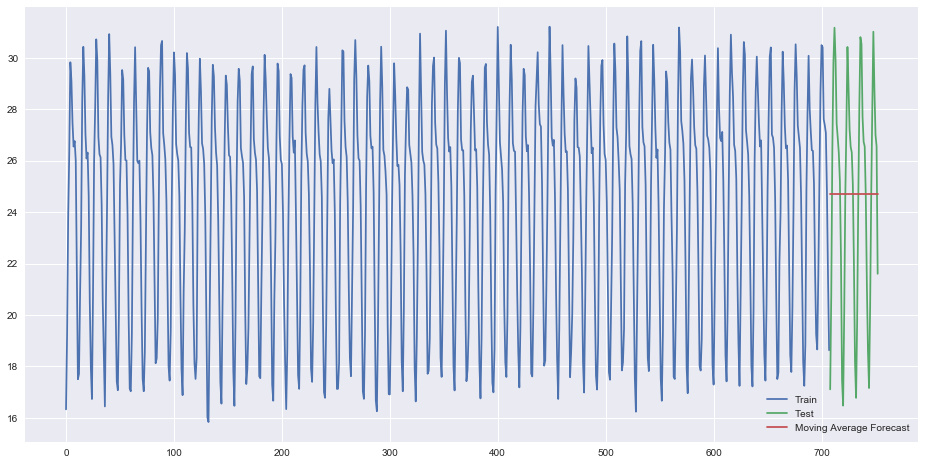

In [24]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['AverageTemperature'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['AverageTemperature'], label='Train')
plt.plot(test['AverageTemperature'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [25]:
rms = sqrt(mean_squared_error(test.AverageTemperature, y_hat_avg.moving_avg_forecast))
print(rms)
# RMSE = 4.348829253116016

4.348829253116016


## Method 4 - Simple Exponential Smoothing

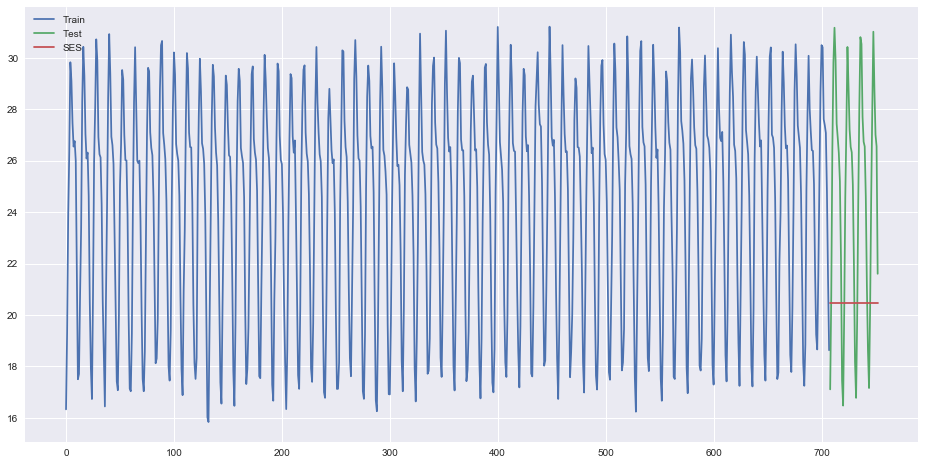

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['AverageTemperature'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['AverageTemperature'], label='Train')
plt.plot(test['AverageTemperature'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [27]:
rms = sqrt(mean_squared_error(test.AverageTemperature, y_hat_avg.SES))
print(rms)
# RMSE = 6.11605713661799

6.11605713661799


## Method 5 - Holt Linear Trend

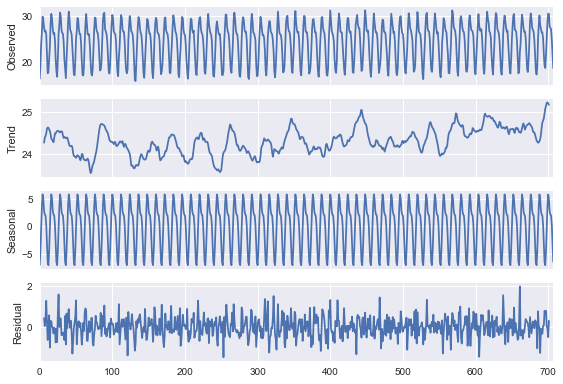

In [32]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.AverageTemperature,freq=12).plot()
result = sm.tsa.stattools.adfuller(train.AverageTemperature)
plt.show()

#### We can see from the graphs obtained that this dataset follows an increasing trend . Hence we can use Holt’s linear trend to forecast the future Temperatures .

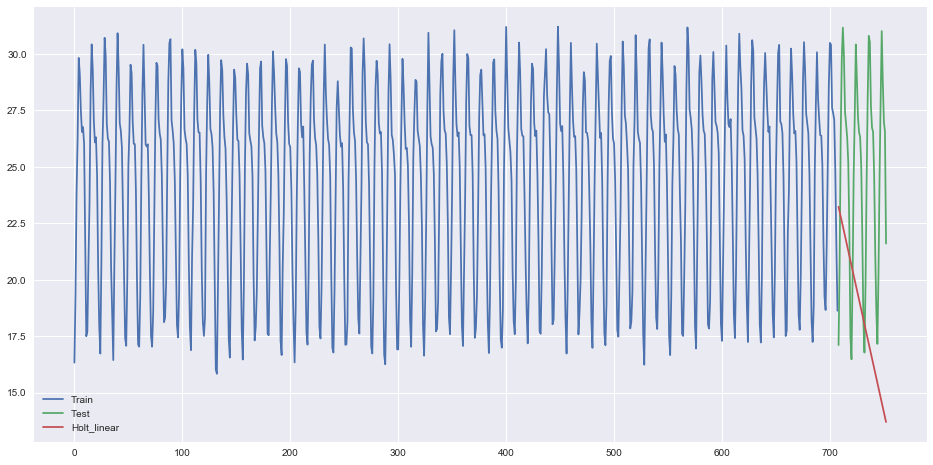

In [33]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['AverageTemperature'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['AverageTemperature'], label='Train')
plt.plot(test['AverageTemperature'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [34]:
rms = sqrt(mean_squared_error(test.AverageTemperature, y_hat_avg.Holt_linear))
print(rms)
#RMSE = 8.17057236530042

8.17057236530042


## Method 6 - Holt Winters Method

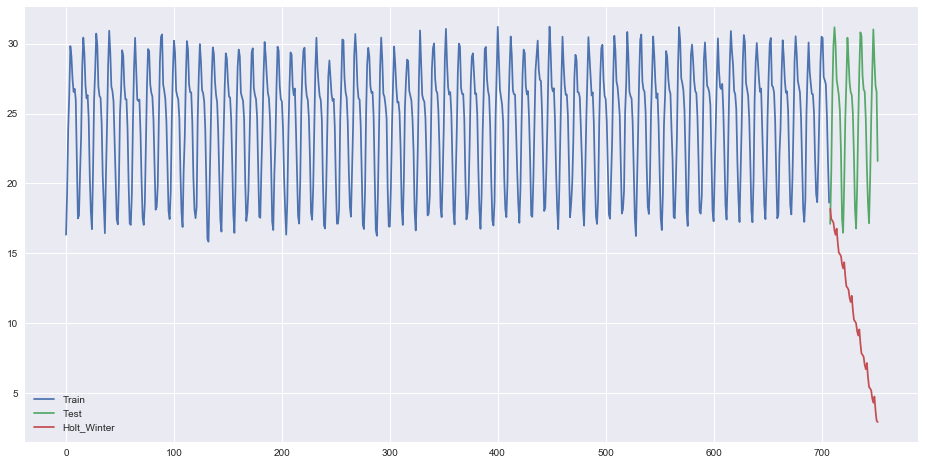

In [35]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['AverageTemperature']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['AverageTemperature'], label='Train')
plt.plot(test['AverageTemperature'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [36]:
rms = sqrt(mean_squared_error(test.AverageTemperature, y_hat_avg.Holt_Winter))
print(rms)

# RMSE = 15.48075007907899

15.48075007907899


## Method - 7 ARIMA

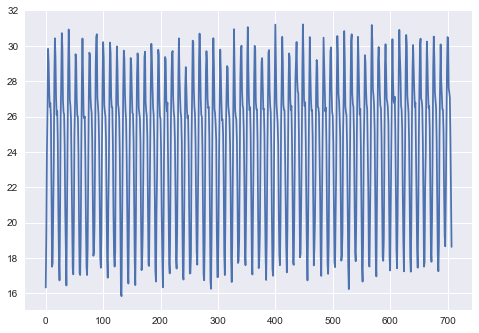

In [37]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

plt.plot(train.AverageTemperature)


C:\Users\varun\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


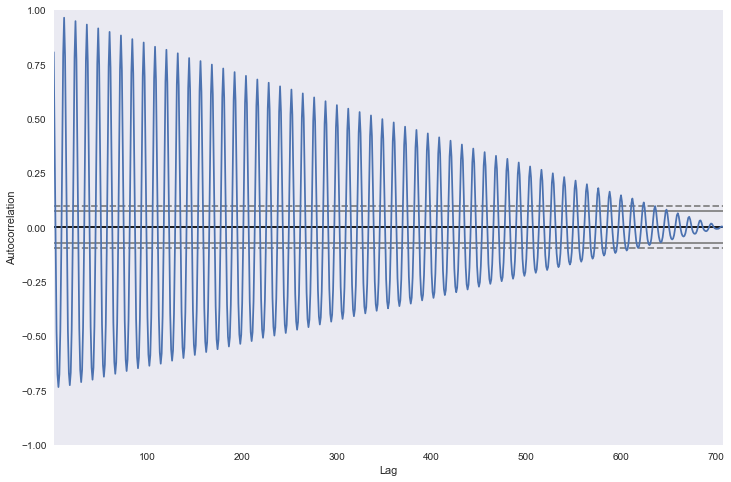

In [38]:
from pandas.tools.plotting import autocorrelation_plot

plt.figure(figsize=(12,8))
autocorrelation_plot(train.AverageTemperature)

C:\Users\varun\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


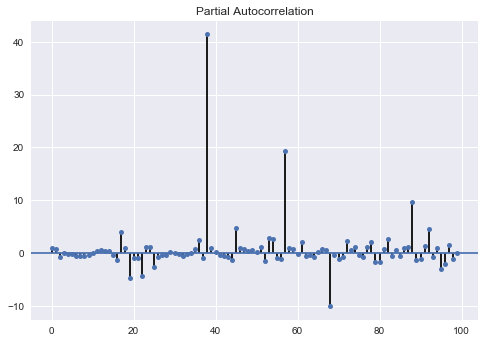

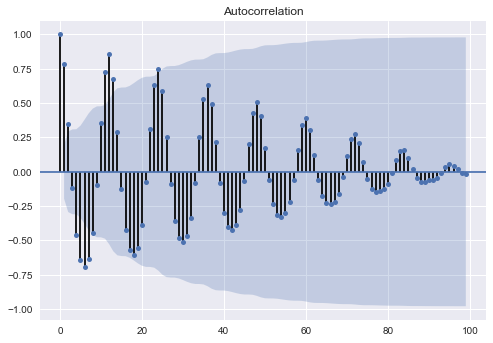

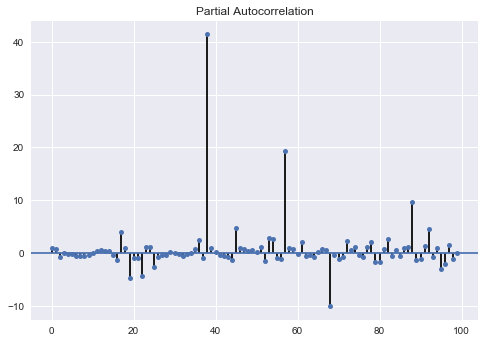

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
acf(train.AverageTemperature)
pacf(train.AverageTemperature)
plot_acf(train.AverageTemperature[:100])
plot_pacf(train.AverageTemperature[:100])

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train.AverageTemperature,freq=12)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.subplot(411)
# plt.plot(train.AverageTemperature, label='Original')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(trend, label='Trend')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(seasonal,label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(residual, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()

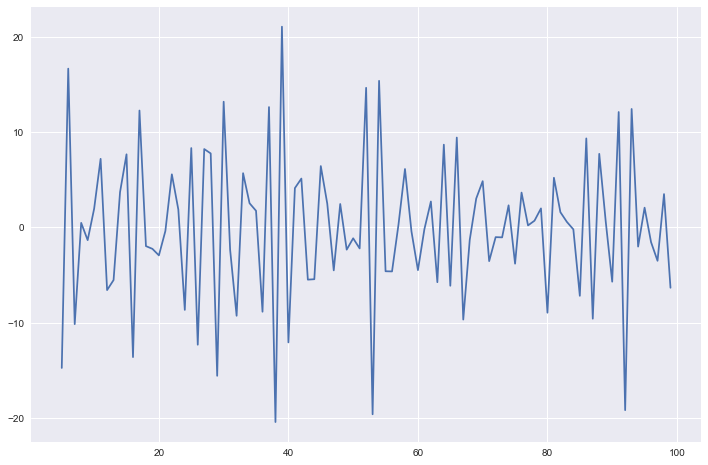

In [42]:
# Forecasting
# ts_log_diff.dropna(inplace=True)

# lag_acf = acf(ts_log_diff, nlags=20)
# lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

ts_diff = train.AverageTemperature - train.AverageTemperature.shift()
for _ in range(4):
    ts_diff = ts_diff - ts_diff.shift()
plt.figure(figsize=(12,8))
plt.plot(ts_diff[:100])

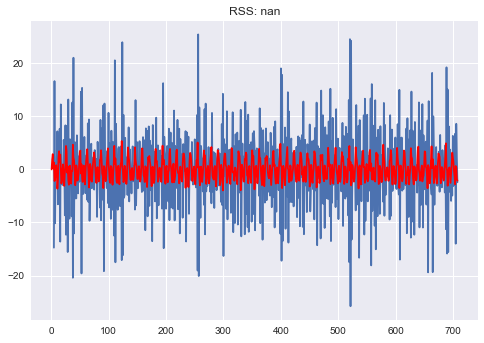

In [43]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.AverageTemperature, order=(3, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

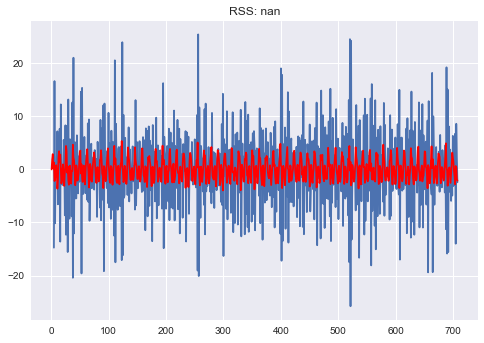

In [44]:
model = ARIMA(train.AverageTemperature, order=(3, 1, 0))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_diff)**2))

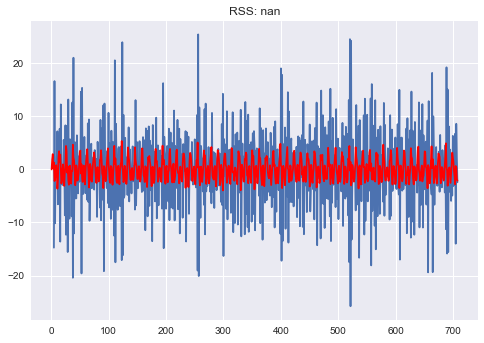

In [45]:
model = ARIMA(train.AverageTemperature, order=(3, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_diff)**2))

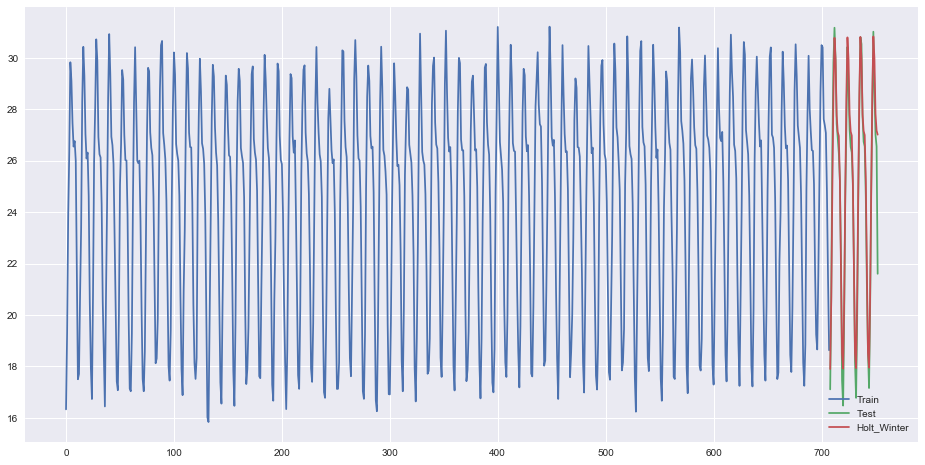

In [52]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['AverageTemperature']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['AverageTemperature'], label='Train')
plt.plot(test['AverageTemperature'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [54]:
rms = sqrt(mean_squared_error(test.AverageTemperature, y_hat_avg.Holt_Winter))
print(rms)


1.059646031938941
